# Shark attack


<img src="https://cdn1.theinertia.com/wp-content/gallery/surfest/vicente-lang-2-670x446.jpg" width="500" align="center">


   Surfing is one of the most popular water sports in the world. the sport itself might not present any risks to humans, however there are some locations that can increase the risk of an accident, for exemple reefs, rocks or in this case that we are going to study **sharks**.


Sharks in fact do not intend to attack humans, the chances of being attacked by a shark is 1 in 5 million. , says Katherine Maslenikov, manager of the UW Fish Collection at the Burke Museum.
When they bite humans, they are most likely trying to figure out what they are. So safe to say that we are not included in their diet.


In this notebook we are going to take a look at the csv file that contains some dataset about the attacks that have happened around the world and see if we can answer some questions like:

- Is surfing a dangerous sport ?

- how likely is to get killed by a shark while surfing?

- what are the areas that most attacks happened while surfing?





# This file is to adjust the order of the data cleaning

# 1.1  Reading the file and dropping duplicates

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import folium
import numpy as np
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
%matplotlib inline
%pylab inline
plt.rc('font', **font)
df= pd.read_csv('C:/Users/Lucas Angulski/Documents/GitHub/Ironhack-DA/project 1/attacks.csv', encoding='latin1')

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
#checking the shape of the data 
print(f'\033[95m {df.shape}\n')
##this means that we have 24 types of data and over 25k  entries##

#checking the size of the data
print(f'\033[0m \n {df.size}')
## The data have over 61k elements

 (25723, 24)

 
 617352


In [5]:
df.info()

## the last two columns have no relevant information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
df.dtypes


Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [7]:
##we can use .drop_duplicates() to eliminate duplicated values

#lets start cleaning the data:

bef = len(df)
print(bef)
df = df.drop_duplicates()

aft= len(df)
print(aft)

print(f'Number of duplicated records removed {bef-aft}')

25723
6312
Number of duplicated records removed 19411


from 25723 rows we left with 'only' 6312 just removing duplicated items.

## lets start cleaning the data


In [8]:
# print(set(df['Activity']))

In [9]:
# df['Activity'].value_counts()

In [10]:
len(df['Activity'])

6312

##  1.2 cleaning Activities:

<img src="https://i.pinimg.com/originals/00/a7/fe/00a7fe30e8db16d49a46b7cb55ec799d.png" width="500" align="center">










### intro

lets define the activities into fewer categories. The column  has many items described not only as a single activity, We will
try to divide them  into sub-categories for better understanding of the attacks.

In order to divide into these categories we will look up for the most known activities that are done in water 

below we will find key words using the famous <b>REGEX </b>.

swimming = swimming / swim

walk = /Wading /  Walking 

Surfing = surfing  or boogie boarding /surfng 

sailing = boating /canoeing / sailing /raft / Kayak /floating

ep_boats = ship/yacht  (engined powered)

Kite/kiting = kitesurfing/ kite boarding/ Skimboarding

fishing = Spearfishing / fishing /net

jet/skiing =  jetskiing /skiing / water-skiing

feeding sharks =  feeding sharks

dive = scuba diving / scuba / dive / Snorkeling

taking photos = photos / photo shooting

other



In [11]:
# activity is defined as object, in order to use regex we need to convert it into STR.

#  REGEX HELPER : https://regexr.com/


In [12]:
df['Activity'] = df['Activity'].astype(str).str.lower()
df['Activity'] = df['Activity'].str.strip()



In [13]:
df['Activity'].dropna(inplace = True)

In [14]:
#https://www.geeksforgeeks.org/extract-punctuation-from-the-specified-column-of-dataframe-using-regex/#:~:text=re.findall%20%28%29%20function%20is%20used%20to%20extract%20all,pattern%20in%20string%2C%20as%20a%20list%20of%20strings.
def activity_Cleaner(row):
    #[SsWw][AaWw][DdIilL][/IikKmM][iIMmNn/][g]*
    #swimming = swimming / swim / jump 
    swimming_pat = re.findall('[sj][wu][im][pm][m]?\w*',row['Activity'])
    #walk = /Wading /  Walking / 
    walking_pat = re.findall('[w][a][dl][k]?\w*',row['Activity'])
    #Surfing = surfing  or boogie boarding /surfng / body surfing
    surfing_pat = re.findall('[sb][ou][ador][rygf][ndi][e]?\w*',row['Activity'])
    #sailing = boating /canoeing / sailing /raft / floating/kayak
    sailing_pat = re.findall('[bcsrkf][aol][anifyo][atol][teki]?\w*',row['Activity'])
    #ep_boats = ship/yacht/adrift  (engined powered)
    ep_boats_pat =  re.findall('[sya][hda][irc][pih][ft]?\w*',row['Activity'])
    #Kite/kiting = kitesurfing/ kite boarding/ Skimboarding
    kite_pat =  re.findall('[sk][ik][it][mie][n]?\w*',row['Activity'])
    #fishing = Spearfishing / fishing /net
    fish_pat = re.findall('[fn][ie][st][h]?\w*',row['Activity'])
    #jet/skiing =  jetskiing /skiing / water-skiing
    jet_pat = re.findall('[s][k][i][i][n]\w*',row['Activity'])
    #dive = scuba diving / scuba / dive / Snorkeling
    dive_pat = re.findall('[ds][inc][vuo][eibr][ak]?\w*',row['Activity'])
    #feeding sharks =  feeding sharks
    feed_pat = re.findall('[f][e][e][d]\w*',row['Activity'])
    #taking photos = photos / photo shooting/ filming
    photo_pat = re.findall('[fp][ih][lo][tm][o]?\w*',row['Activity'])
    #bathing  = bath/bathing 
    bath_pat = re.findall('[b][a][t][h]\w*',row['Activity'])
    #floating in water :
    float_pat = re.findall('[fr][le][os][at]?\w*',row['Activity'])
    ## reading  where it will store each time the word appears in each row, if its different,
    ##it changes the value of the row 
    ## to what the 'return' has been set.
    
    if len(swimming_pat) !=0:
        return 'swimming'
    
    elif len(float_pat) !=0:
        return 'floating in water'

    elif len(walking_pat) !=0:
        return 'walking'
        
    elif len(bath_pat) !=0:
        return 'bathing'   
    
    elif len(surfing_pat) !=0:
        return 'surfing'
    
    elif len(sailing_pat) !=0:
        return 'sailing'
    
    elif len(ep_boats_pat) !=0:
        return 'ep_boats'
    
    elif len(kite_pat) !=0:
        return 'kiting'
    
    elif len(fish_list) !=0:
        return 'fishing'
    
    elif len(jet_pat) !=0:
        return 'skiing'
    
    elif len(dive_pat) !=0:
        return 'diving'
    
    elif len(feed_pat) !=0:
        return 'feeding'
    
    elif len(photo_pat) !=0:
        return 'Photoshooting'
    
    else:
        return  'other'
    
    

In [15]:
df['Activity'] = df.apply(activity_Cleaner, axis = 1)


In [16]:
df['Activity'].value_counts()

surfing              1394
swimming             1159
fishing              1137
other                1101
diving                603
sailing               269
walking               220
bathing               192
floating in water     102
ep_boats               72
kiting                 43
feeding                12
Photoshooting           8
Name: Activity, dtype: int64

##  1.3 Cleaning Fatals

<img src="https://www.nicepng.com/png/detail/320-3206388_sharkwithdiver-cartoon-shark-eating-a-man.png" width="300" align="center">


For this part we will define a function in order to have a better visualization of the lethal attacks.

checking the data, we can see that in the columns 'Injury' and 'Species'  also have some info about the cases involving deaths
that are not listed  inside the Column 'Fatals'


in order to adjust this column we will have to check the values inside the other columns and relate them using *REGEX*

    
    
 

In [17]:
df = df.rename(columns={'Fatal (Y/N)':'Fatal'})
df['Fatal'] = df['Fatal'].str.strip()
df = df.rename(columns={'Species ':'Species'})
df['Species'] = df['Species'].str.strip()
df['Species'] = df['Species'].astype(str).str.lower()

df['Injury'] = df['Injury'].str.strip()
df['Injury'] = df['Injury'].astype(str).str.lower()

In [18]:
df.Fatal.unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', 'y'], dtype=object)

In [19]:
df[df['Fatal']=='2017']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,floating in water,Giorgio Zara,M,57,lower left leg injured provoked accident,2017,Morning,"blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,NaN,NaN


In [20]:
df = df.drop(index=[786])

In [21]:

(~df.isnull()).sum().sort_values(ascending=False)

Species                   6311
Injury                    6311
Activity                  6311
Case Number               6309
original order            6308
Case Number.2             6301
href                      6301
Date                      6301
Case Number.1             6301
pdf                       6301
href formula              6300
Year                      6299
Type                      6297
Investigator or Source    6284
Country                   6251
Name                      6091
Area                      5846
Fatal                     5762
Location                  5761
Sex                       5736
Age                       3470
Time                      2947
Unnamed: 23                  2
Unnamed: 22                  1
dtype: int64

In [22]:

#taking closer look to the data, we see that some there are some null values that we can get rid off.
df.dropna(subset=['Fatal'],inplace=True)

In [23]:
(~df.isnull()).sum().sort_values(ascending=False)

Fatal                     5762
Injury                    5762
original order            5762
Case Number.2             5762
Case Number.1             5762
href                      5762
Activity                  5762
pdf                       5762
Species                   5762
Date                      5762
href formula              5761
Case Number               5761
Year                      5761
Type                      5759
Investigator or Source    5750
Country                   5717
Name                      5609
Area                      5358
Location                  5279
Sex                       5275
Age                       3243
Time                      2801
Unnamed: 23                  2
Unnamed: 22                  1
dtype: int64

In [24]:
# print(set(df['Injury']))

In [25]:
# print(set(df['Species']))

In [26]:
df[(df['Fatal']=='UNKNOWN')]



## the 'UNKNOWN' 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
624,2013.09.08,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",other,female,F,NaN,no details,UNKNOWN,NaN,nan,"WIS-TV, 9/9/2013",2013.09.08-St-Helena.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.09.08,2013.09.08,5679.0,NaN,NaN
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,other,Jamie Adlington,M,NaN,nan,UNKNOWN,NaN,"tiger shark, 2.3m","T. Peake, GSAF",2008.04.20.a-Adlington.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.20.a,2008.04.20.a,5033.0,NaN,NaN
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",bathing,José Luiz Lipiani,M,NaN,nan,UNKNOWN,NaN,nan,"Globo, 6/9/1997",1997.06.07-NV-Lipiani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.06.07,1997.06.07,4053.0,NaN,NaN
2260,1997.02.21,21-Feb-1997,1997.0,Unprovoked,USA,Hawaii,"Sunset Beach, O'ahu",other,Gersome Perreno,M,NaN,no details,UNKNOWN,NaN,nan,G. Balazs,1997.02.21-NV-Perreno.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.02.21,1997.02.21,4043.0,NaN,NaN
2267,1996.12.29,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,surfing,Blair Hall,M,18,nan,UNKNOWN,18h00,nan,"The Advertiser, 12/30/1996, p.3",1996.12.29-BlairHall.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.12.29,1996.12.29,4036.0,NaN,NaN
2295,1996.07.14,14-Jul-1996,1996.0,Unprovoked,USA,Hawaii,"Nakalele Point, Maui",other,Trimurti Day,NaN,NaN,no details,UNKNOWN,NaN,nan,G. Balazs,1996.07.14-NV-TrimurtiDay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.07.14,1996.07.14,4008.0,NaN,NaN
2307,1996.04.28.b,28-Apr-1996,1996.0,Unprovoked,USA,Hawaii,"La'ie Point, O'ahu",other,Wayne Leong,M,NaN,no details,UNKNOWN,NaN,nan,G. Balazs,1996.04.28.b-Leong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.04.28.b,1996.04.28.b,3996.0,NaN,NaN
2323,1996.01.14.b,14-Jan-1996,1996.0,Unprovoked,AUSTRALIA,Western Australia,"Mutton Bird Island, Albany",other,Marris,NaN,NaN,no details,UNKNOWN,NaN,nan,"T. Peake, GSAF",1996.01.14.b-NV-Marris.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.01.14.b,1996.01.14.b,3980.0,NaN,NaN
2328,1995.12.18,18-Dec-1995,1995.0,Unprovoked,USA,Hawaii,Southwest of O'ahu,other,Carlton Taniyama,M,NaN,no details,UNKNOWN,NaN,nan,G. Balazs,1995.12.18-NV-Taniyama.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.12.18,1995.12.18,3975.0,NaN,NaN
2388,1995.05.18,18-May-1995,1995.0,Unprovoked,AUSTRALIA,Western Australia,"Bernier Island, Shark Bay",other,Hutchins,NaN,NaN,no details,UNKNOWN,NaN,nan,"T. Peake, GSAF",1995.05.18-NV-Hutchins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.05.18,1995.05.18,3915.0,NaN,NaN


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

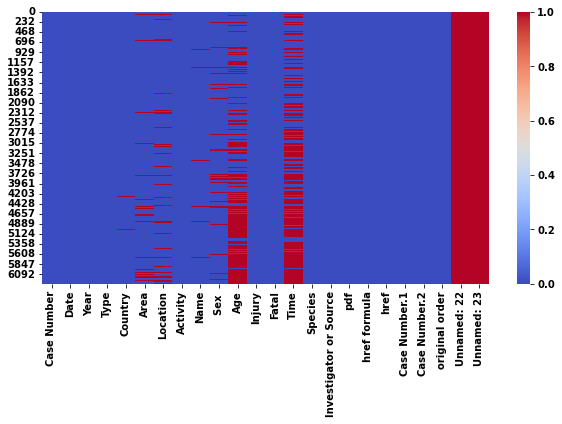

In [27]:
import seaborn as sns
df.dropna()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='coolwarm')


by looking at the graph we can see that so far we did a good job cleaning the columns we have previously analysed.

In [28]:

## defining a function to clean the binary option in fatal:

def clean_Fatal(row):
    if row['Fatal'] == ('Y'):
        return 'Yes'
    elif row['Fatal'] == ('y'):
        return 'Yes'
    elif row['Fatal'] == ('N'):
        return 'No'
    elif row['Fatal'] == ('M'):
        return 'No'
    elif row['Fatal'] == 'UNKNOWN':
        return 'No'

    elif pd.isnull(row['Fatal']) == True:
        
        
        try:
            #checking Species and Injury columns 
            
            #trying to match 'FATAL' 'DEATH' 'DIED' 'DEAD'
            injury_re = re.findall('[fd][eai][tae][atd][lh]',row['Injury'])
            species_re = re.findall('[fd][eai][tae][atd][lh]',row['Species'])
        
            if len(injury_re + species_re) == 0:
                return 'No'

            else:  
                return 'Yes'
        except:
            return 'No info'
            
    else:
        return row['Fatal']

In [29]:
df['Fatal'] = df.apply(clean_Fatal, axis = 1)

In [30]:
len(df['Fatal'])

5762

In [31]:
df['Fatal'].value_counts()

No     4373
Yes    1389
Name: Fatal, dtype: int64

## 1.4 Cleaning Years


<img src="https://www.pngitem.com/pimgs/m/304-3044302_shark-galaxy-cute-ocean-hd-png-download.png" width="300" align="center">

For this column, the data is showing as 'float64' but if in the future we need to analise this with a plot tool, we might 
face some bugs.

Just like the Fatal ones, we can see some  years showing '0' but in the column 'Date' we can get an estimated year of the attack.

for that, we again going to define a function to return these values as year.



In [32]:
# df['Year'].value_counts()

In [33]:
#df[df['Year']<1500]

In [34]:
len(df['Year'])

5762

In [35]:
df=df[df['Year']>1900]

In [36]:
df.dropna(subset=['Year'],inplace=True)

In [37]:
len(df['Year'])

5086

In [38]:
#adding a function to return the year as a int

# same as the 

def year_Clean(row):
    year_re = re.search('([0-9]{4})',str(row))
    if year_re != 0:
        return int(year_re.group())
    else:
        return None

In [39]:
df['Year'] = df.apply(year_Clean, axis = 1)

In [40]:
df.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
       1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931,
       1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920,
       1919, 1900, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901], dtype=int64)

In [41]:
len(df.Year)

5086

## 1.5 Cleaning Countries

Looking at the countries we might see some rows that are not really countries.
For example there are some attacks labeled in "GULF OF ADEN" , "SOUTH ATLANTIC OCEAN"  "ATLANTIC OCEAN".
For these rows, we are going to take a closer look and verify is there is any useful info.

In [42]:
df['Country'] = df['Country'].astype(str).str.upper()
df['Country'] = df['Country'].astype(str).str.strip()

In [43]:
df['Country'] = df['Country'].str.strip()

In [44]:
df['Country'].value_counts()

USA                                      1906
AUSTRALIA                                1084
SOUTH AFRICA                              487
PAPUA NEW GUINEA                          128
BRAZIL                                    100
BAHAMAS                                    95
NEW ZEALAND                                89
MEXICO                                     70
REUNION                                    58
PHILIPPINES                                55
FIJI                                       52
NEW CALEDONIA                              50
ITALY                                      46
MOZAMBIQUE                                 38
EGYPT                                      29
CUBA                                       28
SPAIN                                      26
PANAMA                                     26
SOLOMON ISLANDS                            26
IRAN                                       25
JAPAN                                      25
HONG KONG                         

In [45]:
## there are some countries that we may look a little closer
#ANDAMAN / NICOBAR ISLANDAS
#RED SEA / INDIAN OCEAN
#IRAN / IRAQ 
#SOLOMON ISLANDS / VANUATU
#EGYPT / ISRAEL
#ITALY / CROATIA
#EQUATORIAL GUINEA / CAMEROON


In [46]:
df[df['Country']=='ANDAMAN / NICOBAR ISLANDAS']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4140,1958.09.13,13-Sep-1958,1958,Unprovoked,ANDAMAN / NICOBAR ISLANDAS,NaN,NaN,ep_boats,Sailor of tuna vessel Daisan-Tenyo-Maru,M,32,"fatal, leg bitten",Yes,14h00,blue shark,M. Hosina,1958.09.13-sailor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.09.13,1958.09.13,2163.0,NaN,NaN


In [47]:
df.at[4140,'Country']='NICOBAR ISLANDS'
df.at[3957,'Country']='EGYPT' 
df.at[3957,'Area']='Suez Canal'
df.at[4140,'Country']='IRAN'
df.at[4696,'Country']='SOLOMON ISLANDS'
df.at[4619,'Country']='IRAN'
df.at[2292,'Country']='EGYPT'
df.at[2292,'Area']='South Sinai'
df.at[4934,'Country']='CROATIA'
df.at[5978,'Country']='EQUATORIAL GUINEA'


In [48]:
df.dropna(axis=0, subset=['Country'],inplace=True)

In [49]:
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'NAN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, BRITISH OVERSEAS TERRITORY', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'FIJI',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'AZORES',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SOMALIA', 'C

In [ ]:
##prob not  necessery but filtering countries where there are more than one occurences

df= df.groupby('Country').filter(lambda x : len(x)> 10)

# 1.6 Cleaning Areas

<img src="https://media.giphy.com/media/l41lFw057lAJQMwg0/giphy.gif" width="400" align="center">

The column 'Areas' is massively diverse, for now we are going to check the NaN rows and see if either we can keep them or discart them.



In [50]:
df['Area'] = df['Area'].astype(str).str.strip()

In [51]:
df[(df['Area']=='nan')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,nan,"Magenta Beach, Noumea",surfing,NaN,NaN,NaN,"no injury, shark bit board",No,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271.0,NaN,NaN
33,2018.04.05,05-Apr-2018,2018.0,Unprovoked,BAHAMAS,nan,Bimini,swimming,Shane McConnell,M,12,"2 puncture wounds to left foot, abrasion to ri...",No,18h00,bull shark,"K. McMurray, TrackingSharks.com",2018.04.05-McConnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.05,2018.04.05,6270.0,NaN,NaN
48,2018.01.21,21-Jan-2018,2018.0,Unprovoked,NEW CALEDONIA,nan,Nouville,fishing,male,M,40s,injuries to abdomen and arm,No,15h30,"bull shark, 3 m",TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,6255.0,NaN,NaN
56,2017.12.09,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,nan,NaN,diving,Sarah Illig-Carroll,F,25,minor injury to arm,No,NaN,nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.12.09,2017.12.09,6247.0,NaN,NaN
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,nan,Gars Garabulli,sailing,31 migrants,NaN,NaN,fatal,Yes,NaN,some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244.0,NaN,NaN
62,2017.11.13.R,Reported 13-Nov-2017,2017.0,Unprovoked,NAN,nan,NaN,surfing,Timur Yunusov,M,24,puncture wounds to feet,No,NaN,nan,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,NaN,NaN
90,2017.09.06.R,Reported 06-Sep-2017,2017.0,Unprovoked,SOLOMON ISLANDS,nan,Owarigi Island,fishing,Bartholmew,M,NaN,foot bitten,No,NaN,nan,BBC,2017.09.06-Bartholomew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.06.R,2017.09.06.R,6213.0,NaN,NaN
101,2017.08.18,18-Aug-2017,2017.0,Unprovoked,BAHAMAS,nan,NaN,fishing,male,M,NaN,hand injured,No,15h00,5' shark,"CBS12, 8/18/2017",2017.08.18-JupiterDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.18,2017.08.18,6202.0,NaN,NaN
129,2017.06.18.a,18-Jun-2017,2017.0,Unprovoked,REUNION,nan,Roches Noire,surfing,Julien,M,34,"no injury, shark bit surfboard",No,10h00,"bull shark, 2m","Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6174.0,NaN,NaN
132,2017.06.14.R,Reported 14-Jun-2017,2017.0,Unprovoked,BAHAMAS,nan,NaN,feeding,Carly,F,NaN,fingernail pulled off,No,NaN,nan,"AOL.UK, 6/14/2017",2017.06.14.R-Carly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.14.R,2017.06.14.R,6171.0,NaN,NaN


In [52]:
df = df.drop(index=[4934])
df = df.drop(index=[5978])

In [1]:
# df.to_csv('attacks_cleaned.csv')

In [6]:
df1 = pd.read_csv('attacks_cleaned.csv')

In [55]:
df1.head(5)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",other,Julie Wolfe,F,57,"no injury to occupant, outrigger canoe and pad...",No,18h00,white shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",other,Adyson McNeely,F,11,minor injury to left thigh,No,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,48,injury to left lower leg from surfboard skeg,No,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,NaN,minor injury to lower leg,No,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,diving,Gustavo Ramos,M,NaN,lacerations to leg & hand shark provoked incident,No,NaN,"tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [ ]:
df['Type'].unique()

 # 2.0  Analysis of the Shark Attacks
 
 
 In this section we are going to check the data from our data frame by taking a look on the charts.
 

###  Death rate:


Checking the data from all the attacks, the chart shows that about 80% of all the attacks are non lethal.

(-1.100277796175415,
 1.1007269972935398,
 -1.1004821940329008,
 1.1000229616206143)

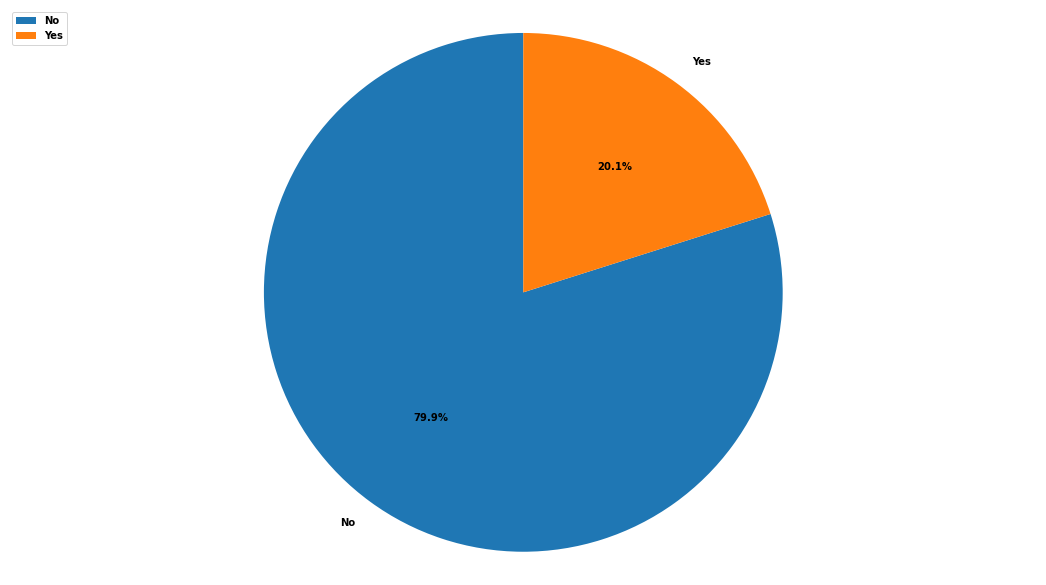

In [56]:
fatal_plot = df1['Fatal'].value_counts()
fig1, ax1 = plt.subplots()  
fig1 = plt.gcf()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(fatal_plot, labels=fatal_plot.index, autopct="%1.1f%%", shadow=False, startangle=90)
plt.legend(fatal_plot.index, loc='upper left')
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.


In [57]:
# fatalis = df['Fatal'].value_counts()

###  2.1 Death Rate by country:

Although  USA has the largest amount of attacks by sharks, comparing the death rate from the other contries, it is not the deadliest. Surprisely  most of the attacks in Philipnes are deadly.

In [59]:
df1['Country'].value_counts()[:10]

USA                 1906
AUSTRALIA           1084
SOUTH AFRICA         487
PAPUA NEW GUINEA     128
BRAZIL               100
BAHAMAS               95
NEW ZEALAND           89
MEXICO                70
REUNION               58
PHILIPPINES           55
Name: Country, dtype: int64

In [60]:
df1['Country'].value_counts(normalize=True)[:10]

USA                 0.374754
AUSTRALIA           0.213134
SOUTH AFRICA        0.095753
PAPUA NEW GUINEA    0.025167
BRAZIL              0.019662
BAHAMAS             0.018679
NEW ZEALAND         0.017499
MEXICO              0.013763
REUNION             0.011404
PHILIPPINES         0.010814
Name: Country, dtype: float64

In [41]:
country_top10= df1.query('Country in ["USA","AUSTRALIA","SOUTH AFRICA","PAPUA NEW GUINEA","BRAZIL","BAHAMAS","NEW ZEALAND","MEXICO","REUNION","PHILIPPINES"]')

In [8]:
fatality_rate = country_top10.groupby('Country').Fatal.apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=True).nlargest(10)

In [9]:
fatality_rate

Country
PHILIPPINES         0.600000
MEXICO              0.500000
REUNION             0.482759
PAPUA NEW GUINEA    0.421875
BRAZIL              0.350000
AUSTRALIA           0.201107
SOUTH AFRICA        0.176591
NEW ZEALAND         0.134831
USA                 0.069255
BAHAMAS             0.052632
Name: Fatal, dtype: float64

#### 2.2.1 top 10 deadliest countries:

<AxesSubplot:xlabel='Country'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


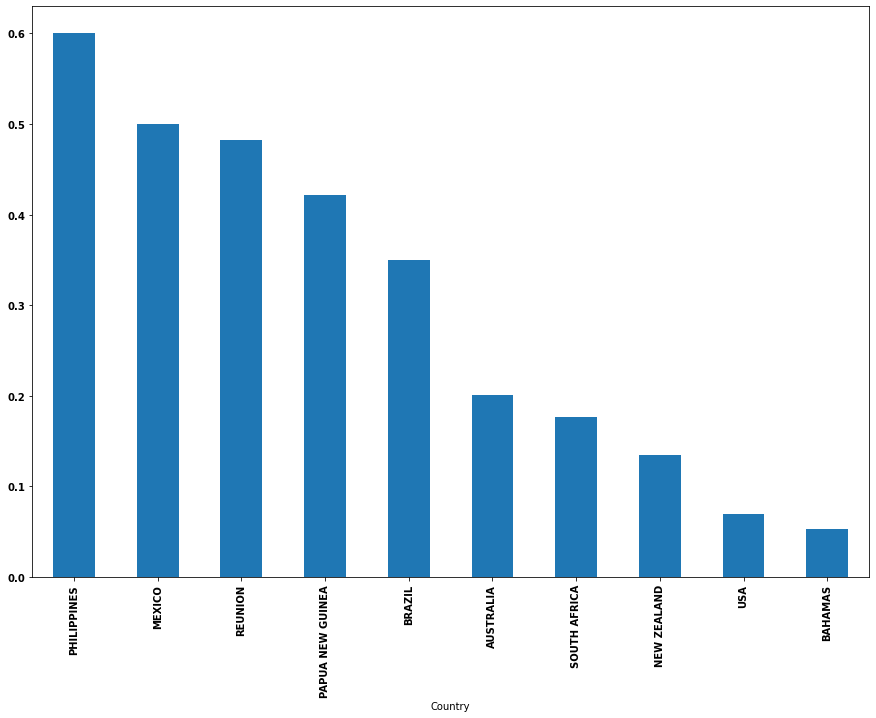

In [64]:
fig, ax = plt.subplots()  
fig = plt.gcf()
fig.set_size_inches(15, 10.5)

fatality_rate.plot(kind='bar')

#### 2.2.2 top 10 deadliest activities

In [65]:
activity_death_rate = country_top10.groupby('Activity').Fatal.apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=True).nlargest(10)

<AxesSubplot:xlabel='Activity'>

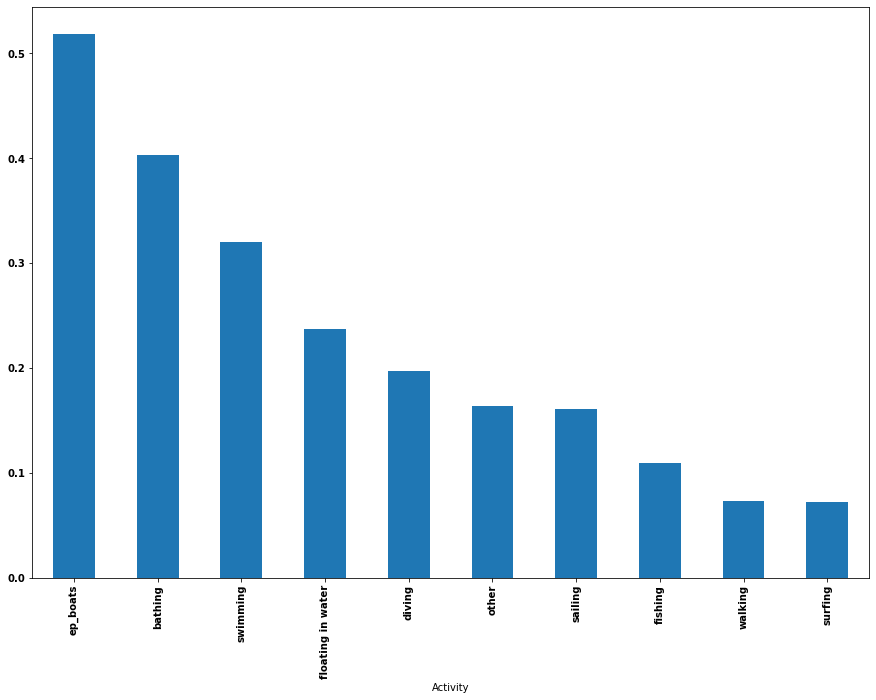

In [66]:
fig, ax = plt.subplots()  
fig = plt.gcf()
fig.set_size_inches(15, 10.5)

activity_death_rate.plot(kind='bar')

## 2.2 Activities:

As we can see one of the most attacked activities is Surfing.

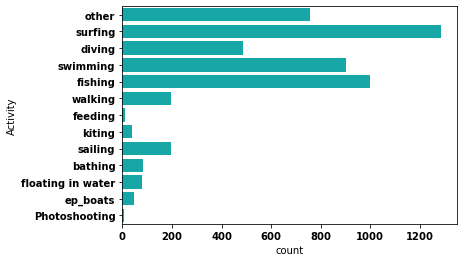

In [67]:
sns.countplot(y="Activity", data=df1, color="c")
plt.show()

In [53]:
surfing_attack_rate = country_top10.groupby('Country').Activity.apply(lambda x: (x == 'surfing').mean()).sort_values(ascending=True).nlargest(20)

In [54]:
surfing_attack_rate

Country
REUNION             0.603448
BRAZIL              0.410000
USA                 0.377230
SOUTH AFRICA        0.279261
AUSTRALIA           0.220480
NEW ZEALAND         0.179775
MEXICO              0.142857
PHILIPPINES         0.036364
BAHAMAS             0.021053
PAPUA NEW GUINEA    0.007812
Name: Activity, dtype: float64

Taking a closer look at the countries where **most of the attacks** happened while **surfing**.



<AxesSubplot:xlabel='Country'>

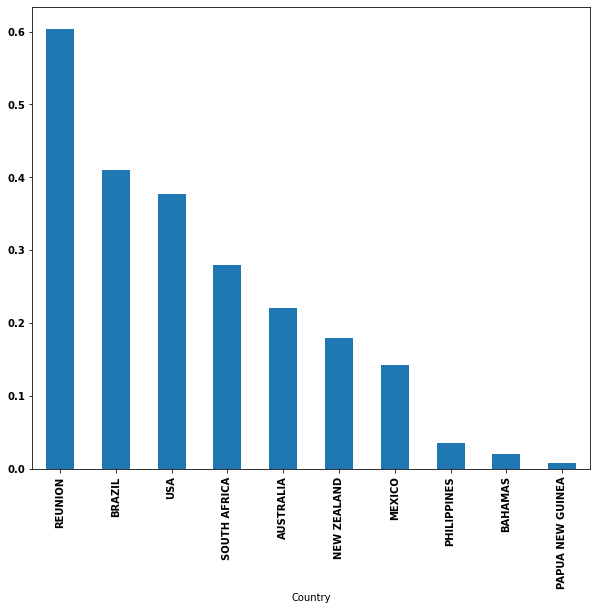

In [69]:
fig, ax = plt.subplots()  
fig = plt.gcf()
fig.set_size_inches(10, 8.5)
surfing_attack_rate.plot(kind='bar')

#### However

Samples from other countries can be quite low, by absolute numbers USA still holds a winner from the number of attacks involving "surfing"

the rank goes 1st USA, 2nd Australia and  3rd South Africa

In [43]:
surfing_top10 = country_top10.query('Activity in ["surfing"]')

In [68]:
surfing_attack = surfing_top10.groupby('Country').Activity.apply(lambda x: (x == 'surfing').value_counts()).sort_values(ascending=True).nlargest(7)

In [69]:
surfing_attack

Country           
USA           True    719
AUSTRALIA     True    239
SOUTH AFRICA  True    136
BRAZIL        True     41
REUNION       True     35
NEW ZEALAND   True     16
MEXICO        True     10
Name: Activity, dtype: int64

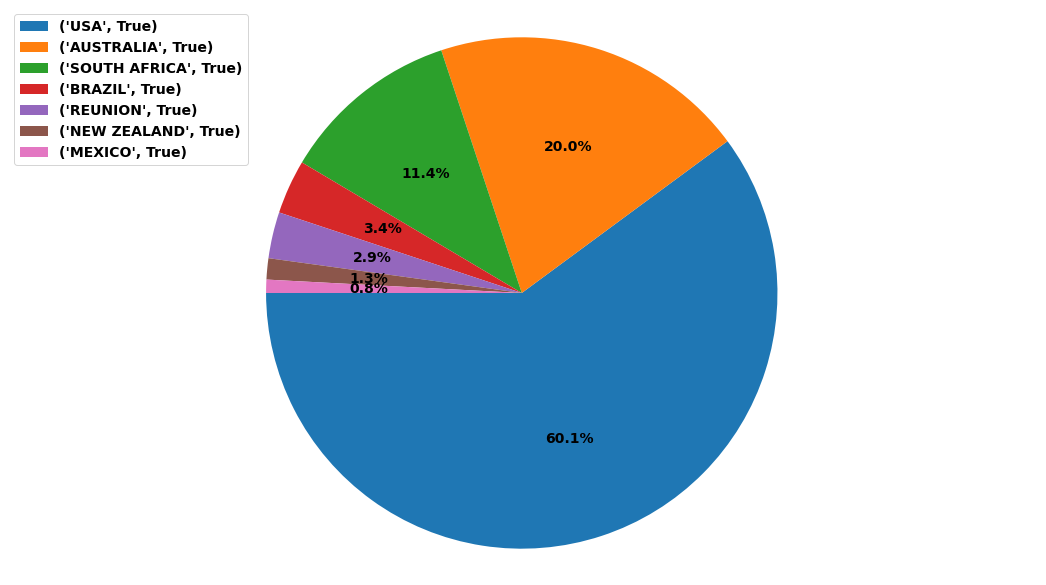

In [70]:
fig1, ax1 = plt.subplots()  
fig1 = plt.gcf()
fig1.set_size_inches(18.5, 10.5)
ax1.pie(surfing_attack, labels=None, autopct="%1.1f%%", shadow=False, startangle=180,rotatelabels=True)
plt.legend(surfing_attack.index, loc='upper left')
ax1.axis("equal");


# 3.0    Mapping the attacks




### Giving a  close location to where the attacks happened.

the problem of the map is that we are going to lose a lot of data from the columns activities, types and other stuff, this is why we are going to analyse this by the end of our analysis.

Most of the data was lost because Latitude and Logitude were not found. This leave us with around 2,5k data rows.

    


In [70]:
df['address']=df['Location']+','+df['Area']+','+df['Country']
df['Latitude']='NaN'
df['Longitude']='NaN'

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 0 to 5550
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5085 non-null   object 
 1   Date                    5086 non-null   object 
 2   Year                    5086 non-null   float64
 3   Type                    5084 non-null   object 
 4   Country                 5086 non-null   object 
 5   Area                    5086 non-null   object 
 6   Location                4751 non-null   object 
 7   Activity                5086 non-null   object 
 8   Name                    4965 non-null   object 
 9   Sex                     4651 non-null   object 
 10  Age                     3155 non-null   object 
 11  Injury                  5086 non-null   object 
 12  Fatal                   5086 non-null   object 
 13  Time                    2704 non-null   object 
 14  Species                 5086 non-null   

In [72]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm
from numba import jit

In [73]:
@jit
def defining_Loc():

    for index, row in tqdm(df.iterrows()):
        address = row['address']
        geolocator=Nominatim(user_agent="Shark_attack", timeout=3)
        location = geolocator.geocode(address)
        if location is None:
            df.loc[index, 'Latitude'] = None
            df.loc[index, 'Longitude'] = None
        else:
            df.loc[index, 'Latitude'] = location.latitude
            df.loc[index, 'Longitude'] = location.longitude

In [74]:
# defining_Loc()

In [75]:
df['Latitude'] = df['Latitude'].replace('NaN', np.nan)
df['Longitude'] = df['Longitude'].replace('NaN', np.nan)
df = df.dropna(axis=0, subset=['Latitude'])
df = df.dropna(axis=0, subset=['address'])

In [76]:
# df.to_csv('attacks_with_loc.csv')

In [12]:
shark_attacks = pd.read_csv('./attacks_with_loc.csv')

In [11]:
shark_attacks.columns

Index(['Unnamed: 0', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Injury', 'Fatal', 'Time', 'Species', 'address', 'Latitude',
       'Longitude'],
      dtype='object')

In [79]:
# shark_attacks.drop(['Unnamed: 0','Case Number','Name','Sex ','Age','Unnamed: 23','original order','Case Number.1','Case Number.2','href','href formula','Investigator or Source','pdf','Unnamed: 22'], axis = 1,inplace =True)

In [12]:
shark_attacks.head(5)

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Injury,Fatal,Time,Species,address,Latitude,Longitude
0,0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",other,"no injury to occupant, outrigger canoe and pad...",No,18h00,white shark,"Oceanside, San Diego County,California,USA",33.195870,-117.379483
1,1,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,minor injury to lower leg,No,NaN,2 m shark,"Arrawarra Headland,New South Wales,AUSTRALIA",-30.060426,153.201685
2,2,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",surfing,"no injury, board bitten",No,NaN,NaN,"Flat Rock, Ballina,New South Wales,AUSTRALIA",-28.842955,153.607990
3,3,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",swimming,fatal,Yes,Late afternoon,tiger shark,"Piedade Beach, Recife,Pernambuco,BRAZIL",-8.176058,-34.917877
4,4,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",walking,lower left leg bitten,No,17h00,"bull shark, 6'","Cocoa Beach, Brevard County,Florida,USA",28.319474,-80.610259


In [81]:
# shark_attacks.to_csv('attacks_with_loc.csv')

In [18]:
shark_attacks = shark_attacks[shark_attacks['Activity']=='surfing']

In [20]:
shark_attacks[["Longitude", "Latitude"]] = shark_attacks[["Longitude", "Latitude"]].apply(pd.to_numeric)

In [24]:
# create map of Portland with Breweries using latitude and longitude values
latitude = 0
longitude = 0
mapping_attacks = folium.Map(location=[latitude, longitude], zoom_start=1.5)
for lat, lng in zip(shark_attacks['Latitude'], 
shark_attacks['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='red',
        fill=True,
        fill_color='#000000',
        fill_opacity=0.5,
        parse_html=False).add_to(mapping_attacks)  
    


While filtering the countries, most of the attacks  around 60% of all the attacks 
happened either in USA or Australia, although most of the attacks at these areas were non lethal, it is a good idea for our surfists to avoid surfing onto these beaches.

In [25]:
mapping_attacks

In [ ]:
df1.query()